In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


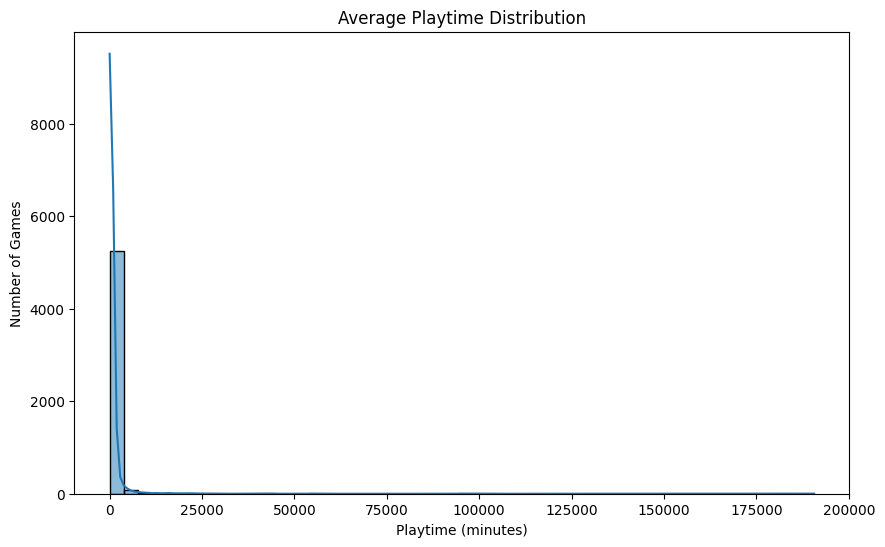

In [27]:
df_filtered = pd.read_csv("../data/steam_cleaned.csv")

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['average_playtime'], bins=50, kde=True)
plt.title('Average Playtime Distribution')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of Games')
plt.show()

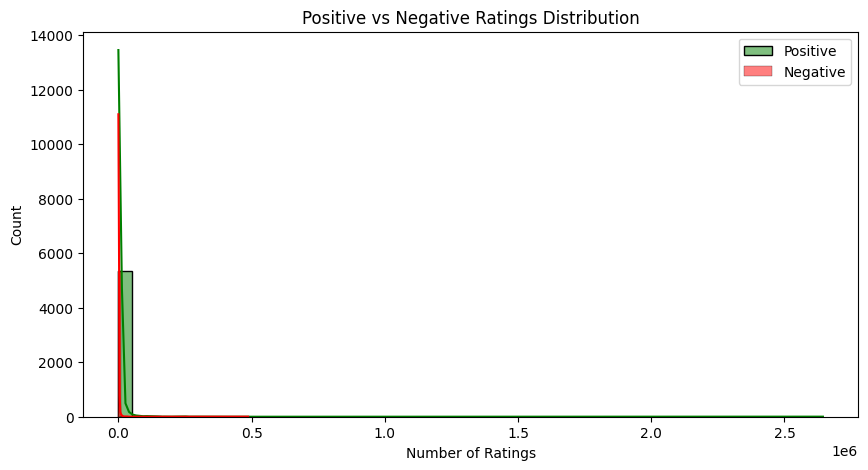

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['positive_ratings'], bins=50, color='green', label='Positive', kde=True)
sns.histplot(df_filtered['negative_ratings'], bins=50, color='red', label='Negative', kde=True)
plt.title("Positive vs Negative Ratings Distribution")
plt.xlabel("Number of Ratings")
plt.legend()
plt.show()

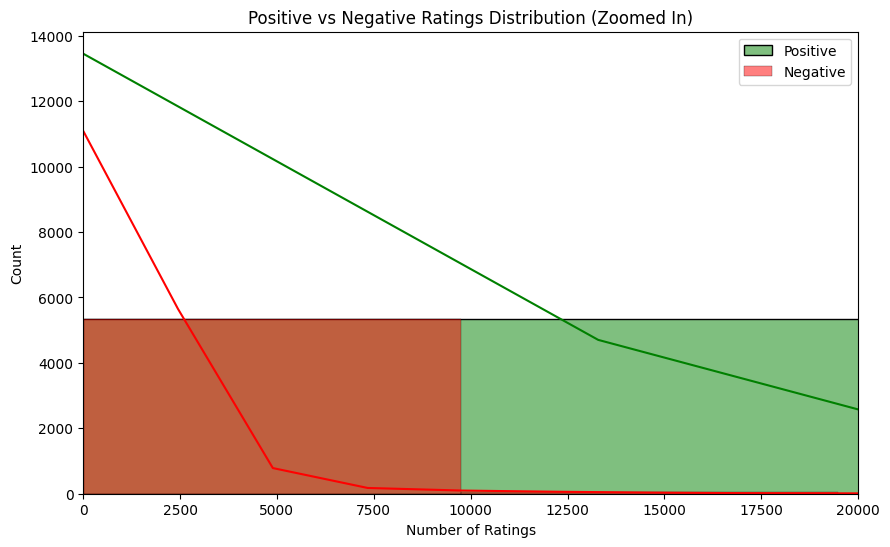

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['positive_ratings'], bins=50, color='green', label='Positive', kde=True)
sns.histplot(df_filtered['negative_ratings'], bins=50, color='red', label='Negative', kde=True)
plt.xlim(0, 20000)  # 리뷰 수 2만 이하까지만 보기
plt.title("Positive vs Negative Ratings Distribution (Zoomed In)")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.legend()
plt.show()

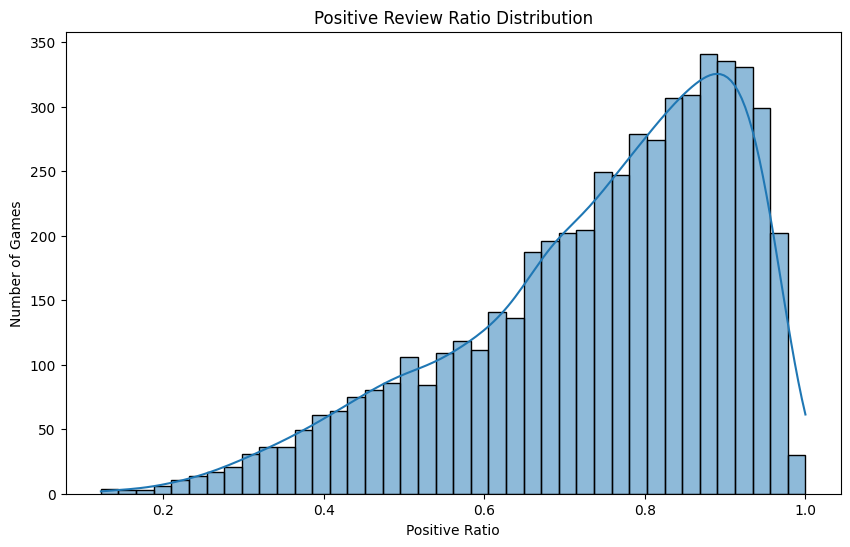

In [17]:
df_filtered['total_ratings'] = df_filtered['positive_ratings'] + df_filtered['negative_ratings']
df_filtered['positive_ratio'] = df_filtered['positive_ratings'] / df_filtered['total_ratings']

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['positive_ratio'], bins=40, kde=True)
plt.title('Positive Review Ratio Distribution')
plt.xlabel('Positive Ratio')
plt.ylabel('Number of Games')
plt.show()

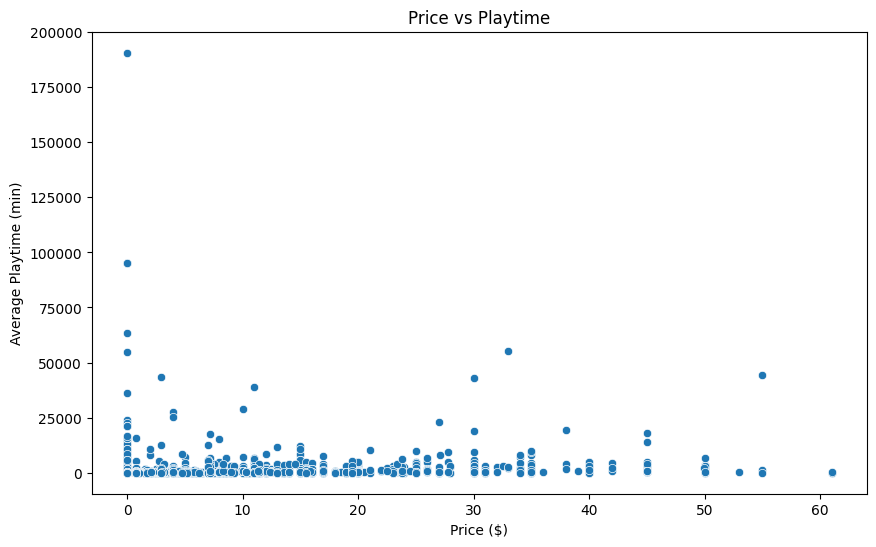

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='price', y='average_playtime')
plt.title("Price vs Playtime")
plt.xlabel("Price ($)")
plt.ylabel("Average Playtime (min)")
plt.savefig("../visuals/PricevsPlaytime.png", dpi=300)
plt.show()




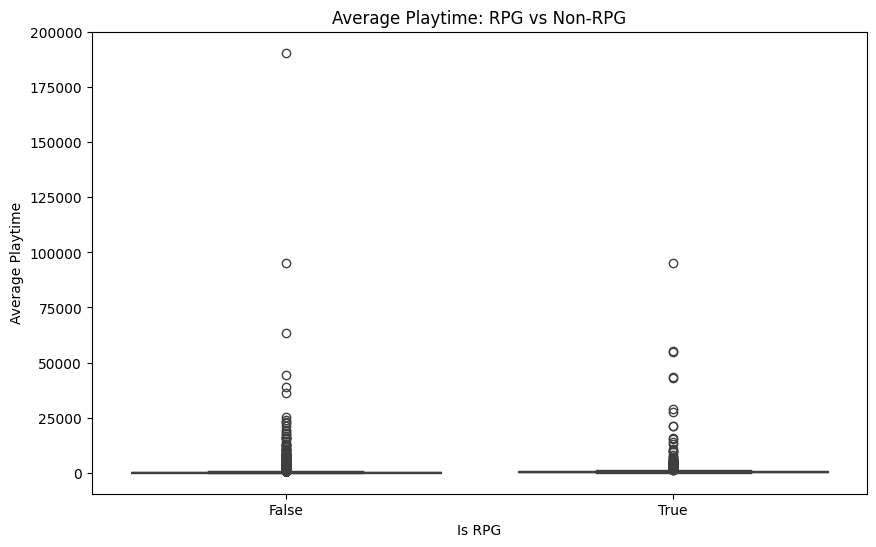

In [22]:
df_filtered['is_rpg'] = df_filtered['genres'].str.contains('RPG', case=False, na=False)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x='is_rpg', y='average_playtime')
plt.title("Average Playtime: RPG vs Non-RPG")
plt.xlabel("Is RPG")
plt.ylabel("Average Playtime")
plt.show()

In [32]:
df_filtered['is_rpg'] = df_filtered['genres'].str.contains('RPG', case=False, na=False)
playtime_summary = df_filtered.groupby('is_rpg')['average_playtime'].agg(['count', 'mean', 'median', 'max']).round(2)

playtime_summary.index = ['Non-RPG', 'RPG'] 
print(playtime_summary)

         count     mean  median     max
Non-RPG   4321   618.21   221.0  190625
RPG       1073  1075.28   280.0   95245
